# Artifical Neural Networks

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

### Importing the Dataset

In [2]:
dataset = pd.read_csv("../Datasets/Artificial Neural Networks (ANN)/Churn_Modelling.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
X = dataset[["CreditScore",
             "Geography","Gender",
            "Age","Tenure","Balance",
            "NumOfProducts","HasCrCard",
             "IsActiveMember","EstimatedSalary"]].values
y = dataset["Exited"].values

In [4]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

### Encoding Categorical Data

In [5]:
# For Gender Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [6]:
# For Geography Column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### Splitting Training and Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN Model

### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding Input Layer and First Hidden Layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation= "relu", input_shape=(X_train.shape[1],)))

### Adding the Second Hidden Layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

### Adding the Output Layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Training the ANN

In [14]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.5166 - accuracy: 0.7944
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4670 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4492 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4409 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4364 - accuracy: 0.7944
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4327 - accuracy: 0.7950
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4301 - accuracy: 0.8020
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.8188
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8219
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4214 - accura

# Making Predictions and Evaluating the Model

### Predicting the result of a single observation

In [15]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))

1/1 [==============================] - 0s 92ms/step
[[0.02803255]]


### Predicting the Test Set Results

In [16]:
y_pred = ann.predict(X_test)
y_pred= (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


### Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1531   76]
 [ 200  193]]


0.862

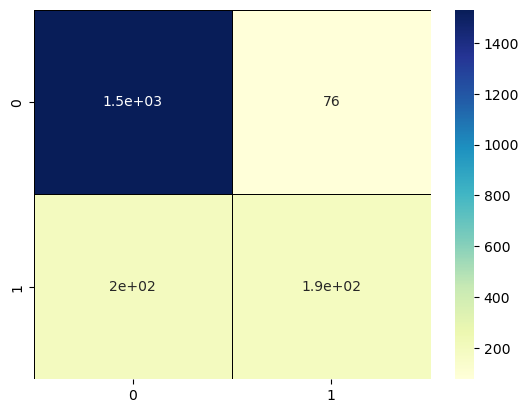

In [18]:
sns.heatmap(cm, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor="black")
plt.show()